Zadanie 1:

In [6]:
def P(n):
    if n == 0:
        return lambda x: 1+x*0
    
    if n == 1:
        return lambda x: x
    
    return lambda x: ((2*n-1)/n*x*P(n-1)(x))-((n-1)/n*P(n-2)(x))

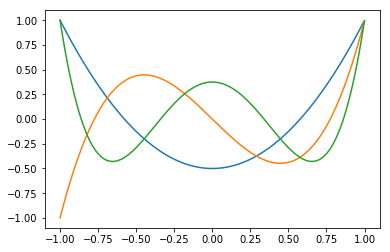

In [9]:
import numpy as np
import matplotlib.pyplot as plt


x = np.arange(-1.0, 1.0, 0.001)

for i in range(2, 5):
    y = P(i)
    plt.plot(x, y(x))

Zadanie 2:

In [10]:
from numpy.polynomial.legendre import leggauss
import scipy.integrate

def integrate_normalized(k, f):
    x, y = leggauss(k)
    x = np.insert(x, 0, -1)
    x = np.append(x, 1)
    sum = 0
    for (i, j) in zip(x, x[1:]):
        sum += (f(i)+f(j))/2*(j-i)
    return sum

Zadanie 3:

In [21]:
def integrate(k, f, a, b):
    return integrate_normalized(k, lambda x: f((b+a)/2 + (b-a)/2*x) * (b-a)/2)

In [22]:
integrate(10, lambda x: 5 + 1*x, 2, 3)

7.499999999999999

In [23]:
integrate(10, lambda x: 2*x**2-3, 3, 1)

-11.372551116371751

In [24]:
integrate(10, lambda x: -1*x**3+4*x**2-5*x+8, -1, 2)

24.915450022193316

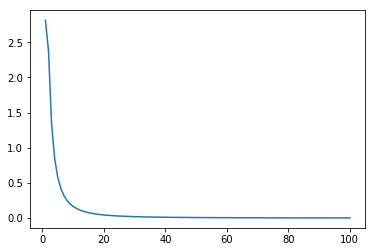

In [26]:
f = lambda x: -1*x**3+4*x**2-5*x+8
accurate = scipy.integrate.quad(f, -1, 2)[0]
x = np.linspace(1, 100, 100)
y = [abs(integrate(int(i), f, -1, 2) - accurate) for i in x]

plt.plot(x, y)

Zadanie 5:

In [27]:
def trapezoidal_method(f, a, b, n):
    h = (b-a)/n
    s = 0
    s += f(a)/2
    for i in range(1, n):
        s += f(a+i*h)
    s += f(b)/2
    res = s*h
    return res

In [32]:
def rectangle_method(f, a, b, n):
    dx = (b-a)/n
    s = 0
    for i in range(1, n):
        i = i*dx+a
        s =+ dx*f(i)
    return s

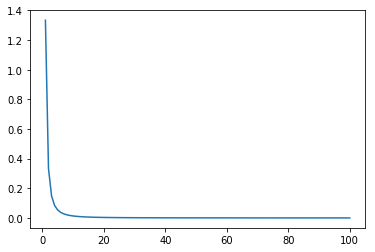

In [33]:
f = lambda x: x**2
accurate = scipy.integrate.quad(f, -1, 1)[0]
x = np.linspace(1, 100, 100)
y = [trapezoidal_method(f, -1, 1, int(i)) - accurate for i in x]

plt.plot(x, y)

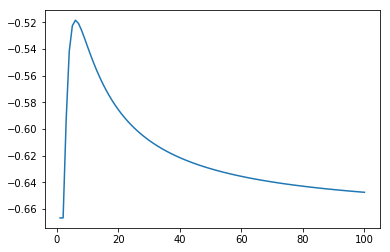

In [34]:
f = lambda x: x**2
accurate = scipy.integrate.quad(f, -1, 1)[0]
x = np.linspace(1, 100, 100)
y = [rectangle_method(f, -1, 1, int(i)) - accurate for i in x]

plt.plot(x, y)